### imports and setup

In [1]:
# check python version to make sure the kernel is set up correctly 
!python --version

Python 3.9.17


In [2]:
# autoreload reloads modules automatically before entering the execution of code in each cell
%load_ext autoreload
%autoreload 2

In [3]:
# uncomment and run this line if the code complains about missing libraries like 
# ordpy; that would be because those need to be set up by the setup/build/develop commants 
# !python setup.py build develop

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from slowfast.utils.connected_components_utils import load_heatmaps

### distribution of energy over frames

In [13]:
def plot_energy_distributions(vid_idx, thresh=0.2):
    """Plot the distribution of gradCAM heatmap energy over the frames in the
    video. The first plot sums the heatmap energy and the second plot takes the
    count of voxels in the heatmap volume above a given threshold.

    Args:
        vid_idx (int): index of the video to examine
        thresh (float): float between 0.0 and 1.0 as a the percent of the
            maximum value in the heatmap at which the heatmap will be binarized
            (only for the second plot)
    """
    # replace the root directory to the heatmaps as desired
    sample_volume_path = f"/research/cwloka/data/action_attn/synthetic_motion_experiments/experiment_1/slowfast_outputs/epoch_100_outputs/heatmaps/grad_cam/pre_softmax/frames/{vid_idx:06d}/fast/"

    volume = load_heatmaps(sample_volume_path)  # shape (T, W, H)
    max_energy = volume.max()
    energy_thresh = thresh * max_energy

    energy_distrib_continous = []
    energy_distrib_binarized = []

    # iterate over frames
    for frame in volume:  # shape (T, W, H)
        # sum up the total energy in each frame
        energy_distrib_continous.append(frame.sum())
        energy_distrib_binarized.append(
            np.where(frame > energy_thresh, 1, 0).sum()
        )

    # then plot the energy distribution
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(energy_distrib_continous)
    axs[0].set_title("distribution of energy weighted")
    axs[1].plot(energy_distrib_binarized)
    axs[1].set_title(
        "distribution of binarized (unweighted) energy above 20% threshold"
    )
    plt.tight_layout()

Generate plots for a bunch of test videos

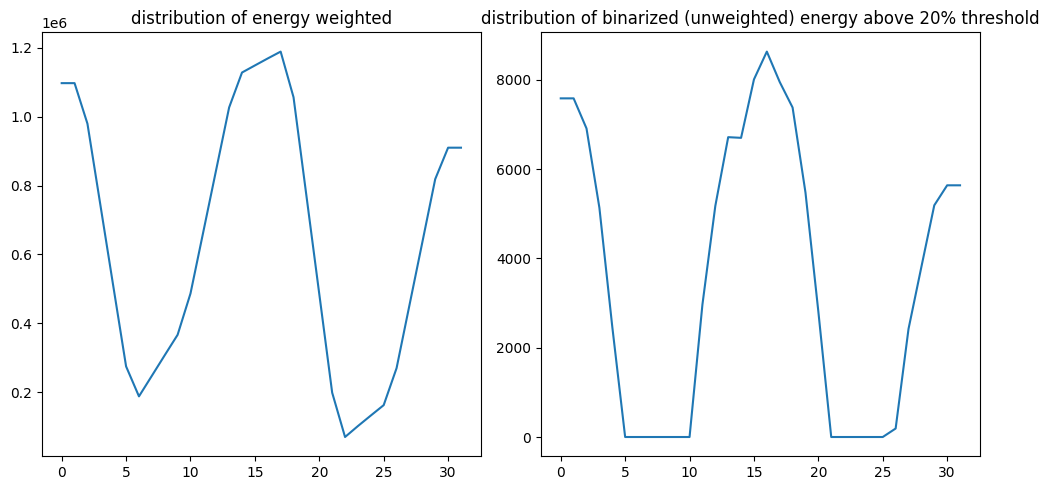

In [14]:
# circle motion (first ~100 videos)
vid_idx = 84
plot_energy_distributions(vid_idx, thresh=0.2)

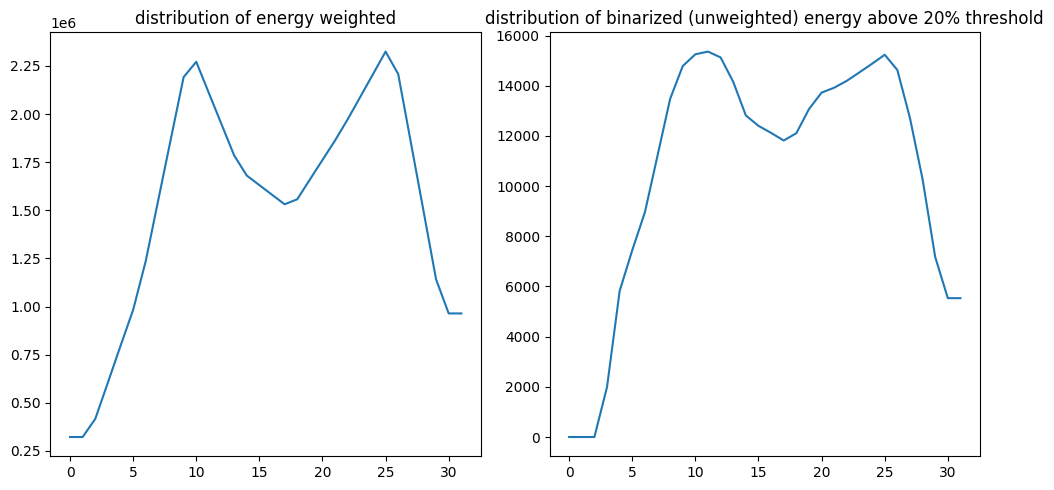

In [15]:
# line motion (second ~100 videos)
vid_idx = 150
plot_energy_distributions(vid_idx, thresh=0.2)

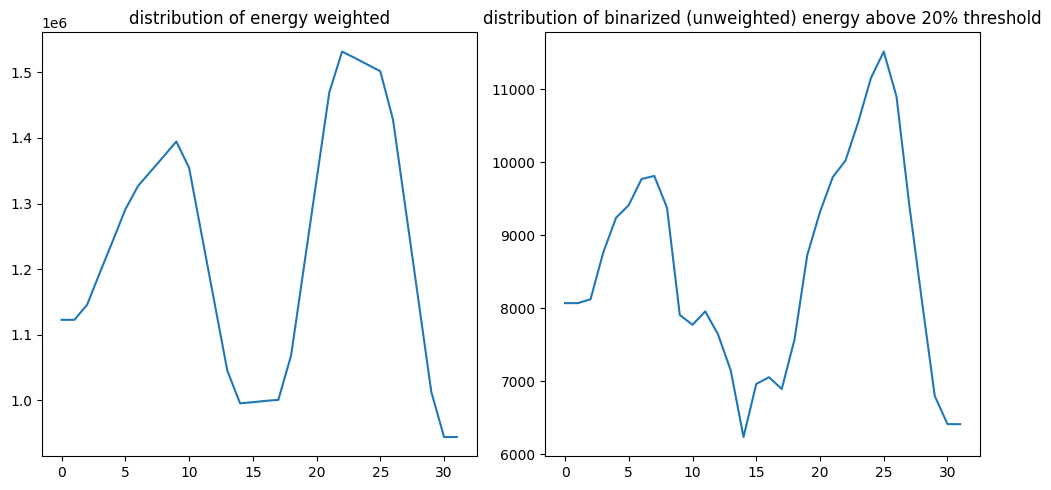

In [16]:
# quadrilateral motion (third ~100 videos)
vid_idx = 250
plot_energy_distributions(vid_idx, thresh=0.2)

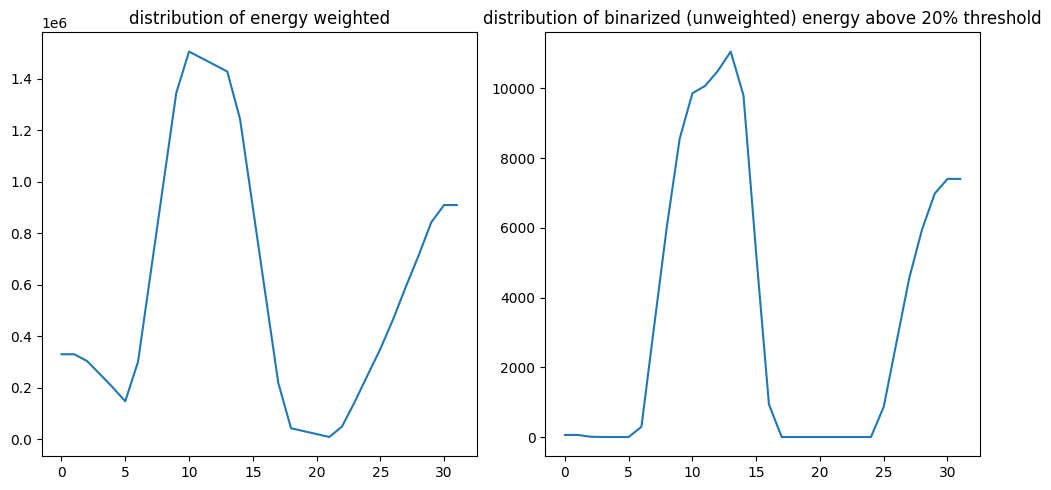

In [17]:
# sinusoid motion (fourth ~100 videos)
vid_idx = 306
plot_energy_distributions(vid_idx, thresh=0.2)

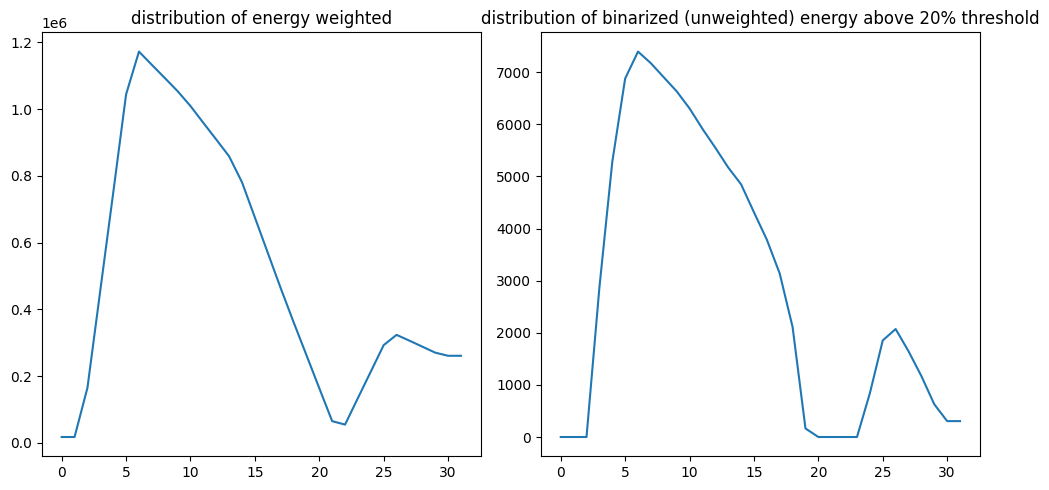

In [18]:
# spiral motion (fifth ~100 videos)
vid_idx = 420
plot_energy_distributions(vid_idx, thresh=0.2)

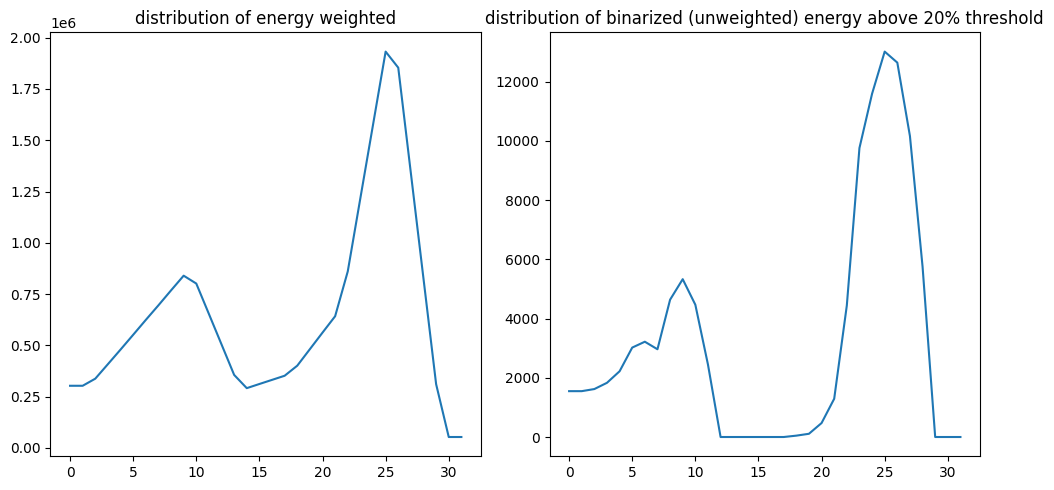

In [19]:
# triangle motion (sixth ~100 videos)
vid_idx = 510
plot_energy_distributions(vid_idx, thresh=0.2)

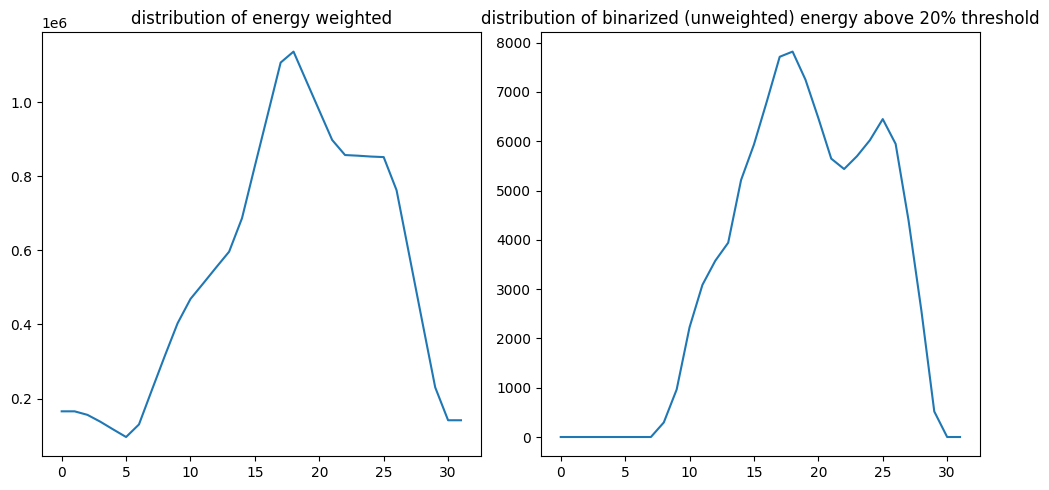

In [20]:
# zigzag motion (seventh ~100 videos)
vid_idx = 610
plot_energy_distributions(vid_idx, thresh=0.2)